In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import calendar
%matplotlib inline

## Date & time exercises (without loading the data)

#### The Apollo 11 mission landed on the moon on  July 20th, 1969
 * What day of week was it?
 * How many days elapsed since the landing till now?
 * Was that a leap year?

In [77]:
date = datetime.datetime(1969, 6, 20)

date.isoweekday()

5

In [78]:
(datetime.datetime.now() - date).days

18001

In [79]:
calendar.isleap(date.year)

False

## Active Satellites in Orbit Around Earth
 * The CSV file is on GitHub in the same folder as this notebook
 * Data Source: https://www.kaggle.com/ucsusa/active-satellites

In [80]:
df = pd.read_csv('active_satellites.csv')

In [81]:
# Here is the International Space Station (ISS) in this list
df[df['Official Name of Satellite'].str.contains('tation')].T

,657
Official Name of Satellite,International Space Station
Country/Organization of UN Registry,USA
Operator/Owner,NASA/Multinational
Country of Operator/Owner,Multinational
Users,Government
Purpose,Space Science
Detailed Purpose,NaN
Class of Orbit,LEO
Type of Orbit,Non-Polar Inclined
Longitude of Geosynchronous Orbit (Degrees),0


#### The olny column with dates is 'Date of Launch'. By default it is loaded as string. Convert the column (or create a new one) so that it contains parsed dates. Let's call it "launched". (feel free to rename other columns as needed for convenience)

In [82]:
df['launched'] = pd.to_datetime(df['Date of Launch'])

#### Remember that we can access the date/time specific functions of Timestamp columns using "dt"

In [83]:
# For example to get the year use
df['launched'].dt.year.head()

0    2016.0
1    2014.0
2    2016.0
3    1997.0
4    2015.0
Name: launched, dtype: float64

#### dt.year returns an integer but the output from the cell above contains the years in a Series object with float data type. Why is it float and not integer?"

In [ ]:
# because there are elements in the launched column that are not an integer

#### Are there any rows with missing launch date? How is this missing data represented in the converted Timestamp column?


In [123]:
df[df.launched.isnull() == True]
df.head()
# The data is represented as NaN (Not a Number)

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,launched
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.00,...,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0,2016-04-25
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.00,...,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0,2014-02-06
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.00,...,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0,2016-06-15
3,ABS-3,Philippines,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,146.06,...,9000,8/19/1997,15,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901.0,1997-08-19
4,ABS-3A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-3.00,...,NaN,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424.0,2015-03-02



#### Drop the rows with missing data for convenience in following tasks. Recompute the 'launched' column and observe that it's now integer

In [112]:
df = df[df.launched.isnull() == False]

#### Plot a histogram of the launch date

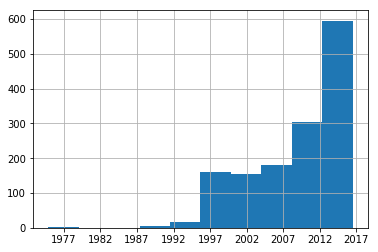

In [133]:
# plt.hist()

# plt.hist()
df['launched'].hist()


#### The histogram above is nice, but it places bin boundaries in some weird places. Let's compute the number of launches each year and then plot it (as either a bar or scatter plot - try both)
 * Hints: use either value_counts() or groupby() to calculate the counts, see the example below:

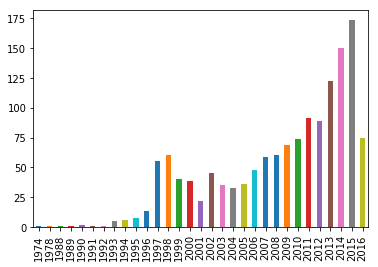

In [147]:
df['launched'].dt.year.value_counts().sort_index().plot(kind="bar")
# datetime.year

## Example of using value_counts() + bar plot

In [9]:
country_count = df['Country of Operator/Owner'].value_counts()
country_count.head()

USA              561
China            180
Russia           136
Multinational     67
Japan             57
Name: Country of Operator/Owner, dtype: int64

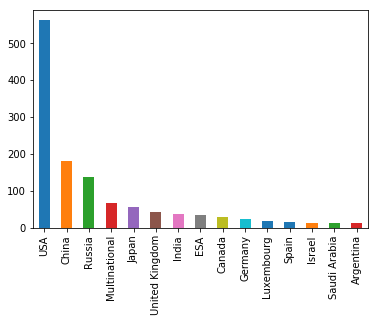

In [14]:
country_count[country_count>10].plot(kind='bar')

#### Plot a similar chart for launch vehicle

#### Now plot the same counts as pie chart (kind='pie'). Group all the small groups (e.g. below 10 satellites) into a single "Other" category

In [22]:
lv_count = df[df.launched.dt.year>2010]['Launch Vehicle'].value_counts()

#### Note that there are many versions of the same rocket, like Ariane 5 and Ariane 5 ECA - each creating a separate slice on the pie chart. This is why we have so many slices. Do the counts by Launch vehicle family, where family can be defined by the first word of the vehicle name. (remember the .str accessor for string functions) 

#### Make a bar plot for launch counts per day of week (day 0 is Monday). Make sure the labels on x axis are reasonably sorted. Looks like Wednesday and Thursday are far more popular days to launch a satellite.

#### Let's look for seasonal variations. take a look at t.dayofyear. Make a histogram of the day of year (of the launch). Anything you can hypothesize about how the aerospace industry sets the deadlines?

## SpaceX market share

#### Find how many satellites per year were launched by SpaceX (Their rocket names all start with "Falcon")

#### What percentage of total number of launches this represents (again, per year)

#### For 2015 compare this information to what you can find on the web. (Note that a single rocket often launches multiple satellites.)

## What are satellites used for

#### What percentage of all satellites have commercial use?
 * Note that the Users columns has dual use values like Government/Commercial

#### What percentage have more than one use? (e.g. Government/Commercial or Commercial/Gov/Mil etc.)

## Orbits

#### Count how many satellites thre are per each Class of orbit. Note that 'LEO' appears twice, the scond time for a single row. Find out why and fix it.
 * LEO stands for Low Earth Orbit - this is where the ISS is
 * GEO is the Geostationary orbit - TV satellites

#### How low the Low Earth Orbit is? Find the median of the apogee for satellites on LEO. Apogee is the highest point of the orbit (perigee is the lowest).

#### Plot a histogram of the apogee for all satellites on LEO 

#### The histogram looks wrong, there is only one bar and the X axis goes all the way to above 300,000 km. Orbits above about 2000 km are not usually called LEO. What's the problem? How can we fix it?

#### Plot a histogram of the apogee for all satelites with apogee below 60,000 km. The two large peaks you see are the LEO and GEO orbits 
 * Take a look at [this visualization of the different orbits on Wikipedia](https://upload.wikimedia.org/wikipedia/commons/b/b4/Comparison_satellite_navigation_orbits.svg)

#### If you are done with all tasks here before the end of the lab, go over the example with Seattle bike count in the book (section 3.11). It shows how to work with a datetime based index 